# Exploring Dandiset 001361: Hippocampal Population Codes in Reward-Based Navigation

**Caution:** This notebook was generated by AI and has not been fully reviewed by human experts. Please use caution when interpreting the code or results. Some sections or visualizations may require independent verification.

## Overview

This notebook provides an initial exploration of Dandiset [001361, version 0.250406.0045](https://dandiarchive.org/dandiset/001361/0.250406.0045) titled:

> **A flexible hippocampal population code for experience relative to reward**

- **Data summary**: 2-photon imaging and behavioral data from hippocampal area CA1 during virtual reality navigation in mice. This data supports research on how hippocampal activity encodes sequences of experience relative to moving reward locations.
- **Reference**: Sosa, M.; Plitt, M. H.; Giocomo, L. M. (2025) [doi:10.48324/dandi.001361/0.250406.0045](https://doi.org/10.48324/dandi.001361/0.250406.0045)
- **Keywords**: hippocampus, navigation, learning, memory, 2-photon imaging, place cells

The notebook demonstrates:
- How to load Dandiset metadata and assets using the DANDI API
- How to open and query NWB files remotely
- How to summarize structure and visualize content of an example NWB file
- Example analyses for imaging and behavioral data

To see the browsable Dandiset, visit:  
https://dandiarchive.org/dandiset/001361/0.250406.0045

## Required Packages

Ensure these Python packages are installed before running the notebook:
- dandi
- pynwb
- remfile
- h5py
- numpy
- matplotlib
- pandas

These should be available in your environment. If not, install using your environment manager.

## Basic Metadata and Asset Listing
Load and display Dandiset metadata and preview assets using the DANDI API.

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive and get Dandiset
client = DandiAPIClient()
dandiset = client.get_dandiset("001361", "0.250406.0045")

# Display metadata
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata.get('url', 'https://dandiarchive.org/dandiset/001361/0.250406.0045')}")

# List the first 5 assets
assets = list(dandiset.get_assets())
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: A flexible hippocampal population code for experience relative to reward
Dandiset URL: https://dandiarchive.org/dandiset/001361/0.250406.0045

First 5 assets:
- sub-m11/sub-m11_ses-05_behavior+ophys.nwb (ID: a22cc1da-b5e8-4fea-a770-7b83a6e79656)
- sub-m11/sub-m11_ses-04_behavior+ophys.nwb (ID: b53ef825-89ca-483e-abeb-b38a0ae9293c)
- sub-m11/sub-m11_ses-07_behavior+ophys.nwb (ID: 27481b95-aeb2-4108-b7ac-b3859892da7a)
- sub-m11/sub-m11_ses-06_behavior+ophys.nwb (ID: 5a5da0ea-5e7a-497b-a3aa-7e6ee1628bde)
- sub-m11/sub-m11_ses-08_behavior+ophys.nwb (ID: d4e069d6-40f6-4702-92d4-70abfd65c1bd)


## Select an Example NWB File

We'll explore:  
**sub-m11/sub-m11_ses-03_behavior+ophys.nwb**  
[Direct download URL](https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/)

**Explore this file in [Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/&dandisetId=001361&dandisetVersion=draft)**

This NWB file contains two-photon imaging, processed cell fluorescence, and aligned behavioral data for a single session.

## How to Load the NWB File Remotely

NWB files are large and accessed remotely from the DANDI Archive.  
The following code loads the file efficiently using PyNWB and remfile for remote streaming (do **not** download the full file):

In [2]:
import pynwb
import h5py
import remfile

url = "https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start: {nwb.session_start_time}")
print(f"Subject: ID={nwb.subject.subject_id}, species={nwb.subject.species}, sex={getattr(nwb.subject, 'sex', 'N/A')}")

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session description: processed suite2p data
Identifier: /data/InVivoDA/GCAMP11/23_02_2023/Env1_LocationB_to_A
Session start: 2023-02-23 00:00:00-08:00
Subject: ID=m11, species=Mus musculus, sex=M


## High-Level Organization of the NWB File

### Key groups available:

The NWB file is organized in a nested, hierarchical structure.  
Here is a basic view of the file's top-level fields and (where appropriate) key subfields:

In [3]:
print("Top-level NWB fields:", nwb.fields)  # programmatic hierarchy root
print("Acquisition:", list(nwb.acquisition.keys()))
print("Processing modules:", list(nwb.processing.keys()))
print("Devices:", list(nwb.devices.keys()))
print("Imaging planes:", list(nwb.imaging_planes.keys()))

if "behavior" in nwb.processing:
    print("Behavioral time series:", list(nwb.processing["behavior"].data_interfaces["BehavioralTimeSeries"].time_series.keys()))
if "ophys" in nwb.processing:
    print("Ophys data interfaces:", list(nwb.processing["ophys"].data_interfaces.keys()))

# **Behavioral time series** include position, speed, lick, reward, trial information, etc.  
# **Ophys data** include suite2p segmentation, fluorescence traces, and image summaries.

# A typical layout:
# 
# ```
# - acquisition
#     - TwoPhotonSeries (movie/frames)
# - processing
#     - behavior
#         - BehavioralTimeSeries
#             - position (TimeSeries)
#             - speed (TimeSeries)
#             ...
#     - ophys
#         - Fluorescence (RoiResponseSeries)
#         - Deconvolved (RoiResponseSeries)
#         - Neuropil (RoiResponseSeries)
#         - ImageSegmentation (PlaneSegmentation)
#         - Backgrounds_0 (reference images)
# ```
#
# Most arrays/tables are *not* loaded until needed.

Top-level NWB fields: {'session_description': 'processed suite2p data', 'identifier': '/data/InVivoDA/GCAMP11/23_02_2023/Env1_LocationB_to_A', 'session_start_time': datetime.datetime(2023, 2, 23, 0, 0, tzinfo=tzoffset(None, -28800)), 'timestamps_reference_time': datetime.datetime(2023, 2, 23, 0, 0, tzinfo=tzoffset(None, -28800)), 'file_create_date': [datetime.datetime(2025, 3, 12, 23, 45, 29, 830157, tzinfo=tzoffset(None, -25200))], 'experimenter': ('Mari Sosa',), 'acquisition': {'TwoPhotonSeries': TwoPhotonSeries pynwb.ophys.TwoPhotonSeries at 0x126859579088032
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (1, 1, 1), type "<f8">
  description: no description
  dimension: <HDF5 dataset "dimension": shape (2,), type "<i8">
  format: raw
  imaging_plane: ImagingPlane pynwb.ophys.ImagingPlane at 0x126859579938944
Fields:
  conversion: 1.0
  description: standard
  device: Microscope pynwb.device.Device at 0x126859579088224
Fields:
  description: My 

## Visualizing Imaging Data: Mean and Max Projections

Mean and max projection images from the two-photon stacks provide a quick assessment of the data.  
These images show the mean/max intensity across all frames.

> **Tip**: Bright spots indicate cell bodies; lower intensity regions correspond to background tissue.

import numpy as np
import matplotlib.pyplot as plt

Load mean and max projection images (Backgrounds_0)
meanImg = np.array(nwb.processing["ophys"].data_interfaces["Backgrounds_0"].images["meanImg"].data)
max_proj = np.array(nwb.processing["ophys"].data_interfaces["Backgrounds_0"].images["max_proj"].data)

plt.figure(figsize=(8, 6))
plt.imshow(meanImg, cmap='gray')
plt.title("Mean Fluorescence Projection")
plt.axis('off')
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(max_proj, cmap='gray')
plt.title("Max Fluorescence Projection")
plt.axis('off')
plt.show()

### Visualizing ROI (Cell) Segmentation Masks

"Regions of Interest" (ROIs) were identified by suite2p segmentation. Each ROI is a group of pixels corresponding to a candidate neuron/cell.
In the overlay below, each ROI mask is colored in red over the mean projection image. This helps visualize where and how cells were segmented.

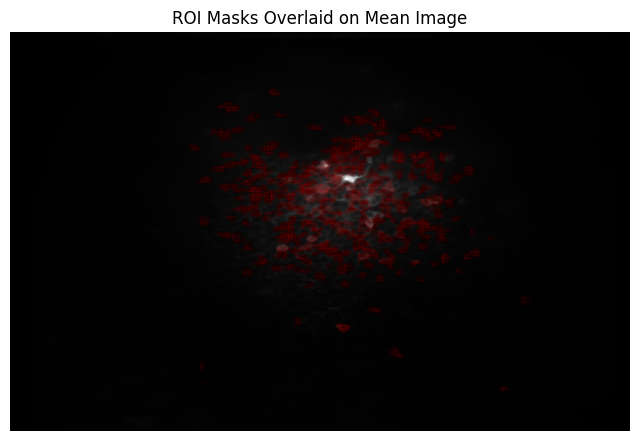

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Overlay ROI masks on mean image
plane_seg = nwb.processing["ophys"].data_interfaces["ImageSegmentation"].plane_segmentations["PlaneSegmentation"]
meanImg = np.array(nwb.processing["ophys"].data_interfaces["Backgrounds_0"].images["meanImg"].data)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(meanImg, cmap="gray")
for ii in range(len(plane_seg.id)):
    pmask = plane_seg["pixel_mask"][ii]
    for y, x, v in pmask:
        ax.plot(x, y, 'r.', markersize=1, alpha=0.03)
ax.set_title("ROI Masks Overlaid on Mean Image")
ax.axis("off")
plt.show()

## Example ROI Fluorescence Traces (ΔF/F)

Each "ROI" (cell candidate) has an extracted fluorescence activity trace over time.  
ΔF/F denotes the percent change in fluorescence over baseline, a common measure in calcium imaging for cell activity.

Below, traces from 6 random cells are shown after normalizing (z-scoring) each, to help compare shapes and transient events between cells.
 
- **ROI**: Region of interest, usually a segmented candidate cell body
- **ΔF/F**: Relative fluorescence change (activity measure)

import random

plane = nwb.processing["ophys"].data_interfaces["Fluorescence"].roi_response_series["plane0"]
fluorescence = np.array(plane.data)  # shape: (frames, rois)
num_cells = fluorescence.shape[1]
num_frames = fluorescence.shape[0]

random.seed(0)
if num_cells >= 6:
    cell_indices = random.sample(range(num_cells), 6)
else:
    cell_indices = list(range(num_cells))

Normalize each trace: (x - mean) / std
fluorescence_norm = (fluorescence - fluorescence.mean(axis=0)) / (fluorescence.std(axis=0) + 1e-9)

plt.figure(figsize=(10, 6))
for idx in cell_indices:
    plt.plot(np.arange(num_frames), fluorescence_norm[:, idx], label=f'Cell {idx}')
plt.xlabel("Frame")
plt.ylabel("Normalized ΔF/F (z-score)")
plt.title("Example ROI Fluorescence Traces (Normalized ΔF/F)")
plt.legend()
plt.tight_layout()
plt.show()

## Behavior: Mouse Position and Reward Delivery

In this experiment, the "position" measures the mouse's progress along a virtual linear track (units: cm). 
Value resets/large jumps correspond to lap boundaries or teleportation events.
Reward is delivered at specific positions (location may change across laps to study reward-referenced encoding).

Reward times are marked as red points.

Position time series
position = nwb.processing["behavior"].data_interfaces["BehavioralTimeSeries"].time_series["position"]
pos_data = np.array(position.data[:])
pos_times = np.array(position.timestamps[:])

Reward events
reward = nwb.processing["behavior"].data_interfaces["BehavioralTimeSeries"].time_series["Reward"]
reward_times = np.array(reward.timestamps[:])

plt.figure(figsize=(12, 6))
plt.plot(pos_times, pos_data, label='Position (cm)', color='blue', lw=1)
plt.scatter(reward_times, np.interp(reward_times, pos_times, pos_data),
            marker='o', color='red', s=40, label="Reward")
plt.xlabel("Time (s)")
plt.ylabel("Position on Virtual Track (cm)")
plt.title("Mouse Position on Track and Reward Delivery")
plt.legend()
plt.tight_layout()
plt.show()

## Summary and Future Directions

This notebook demonstrates how to:
- Load and preview Dandiset 001361 metadata and assets from the DANDI Archive
- Access and remotely query NWB files hosted on DANDI
- Visualize imaging data (summary projections, fluorescence traces)
- Explore behavioral event data (position, reward)

### Next steps for analysis:
- Investigate other behavioral variables (lick, speed, trial transitions)
- Relate specific ROI/cell activity to behavioral metrics (e.g., reward approach)
- Visualize segmentation mask detail and explore image segmentation QC
- Explore Deconvolved or Neuropil traces for further analysis

*See the [DANDI Archive](https://dandiarchive.org/dandiset/001361/0.250406.0045) for more information and additional files.*